# 感知机笔记
## 单层感知机

- 感知机输出的是离散的类，线性回归输出的是连续的数
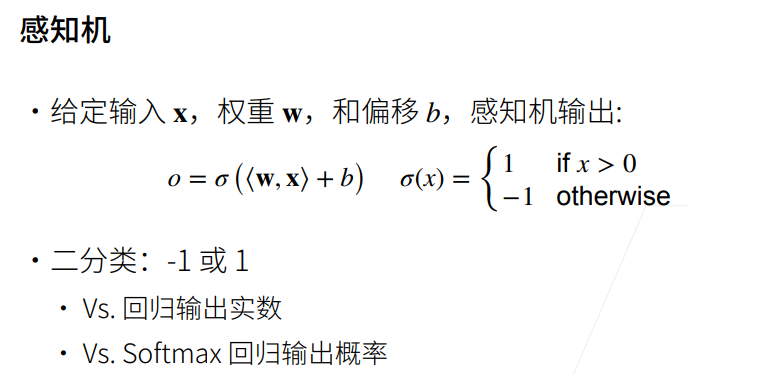

- 如果分类正确的话y<w,x>为正数，负号后变为一个负数，max后输出为0，则梯度不进行更新。

- 如果分类错了，y<w,x>为负数，下图中的if判断就成立了，就有梯度进行更新。

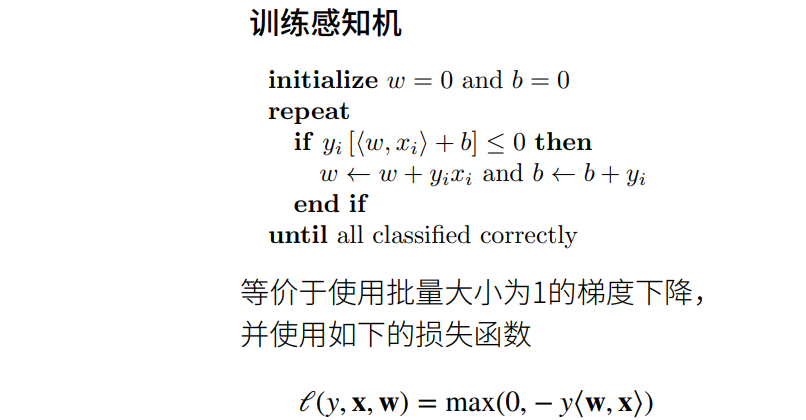

- r代表数据大小。所以收敛步数和r成正比
- 余量r就是这条直线到离它最近的数据点的垂直距离。如果我们能够找到一条直线，使得数据点离这条直线都比较远（即较大），那么这个分类器的性能就比较好，而且根据收敛定理，收敛速度也会更快。
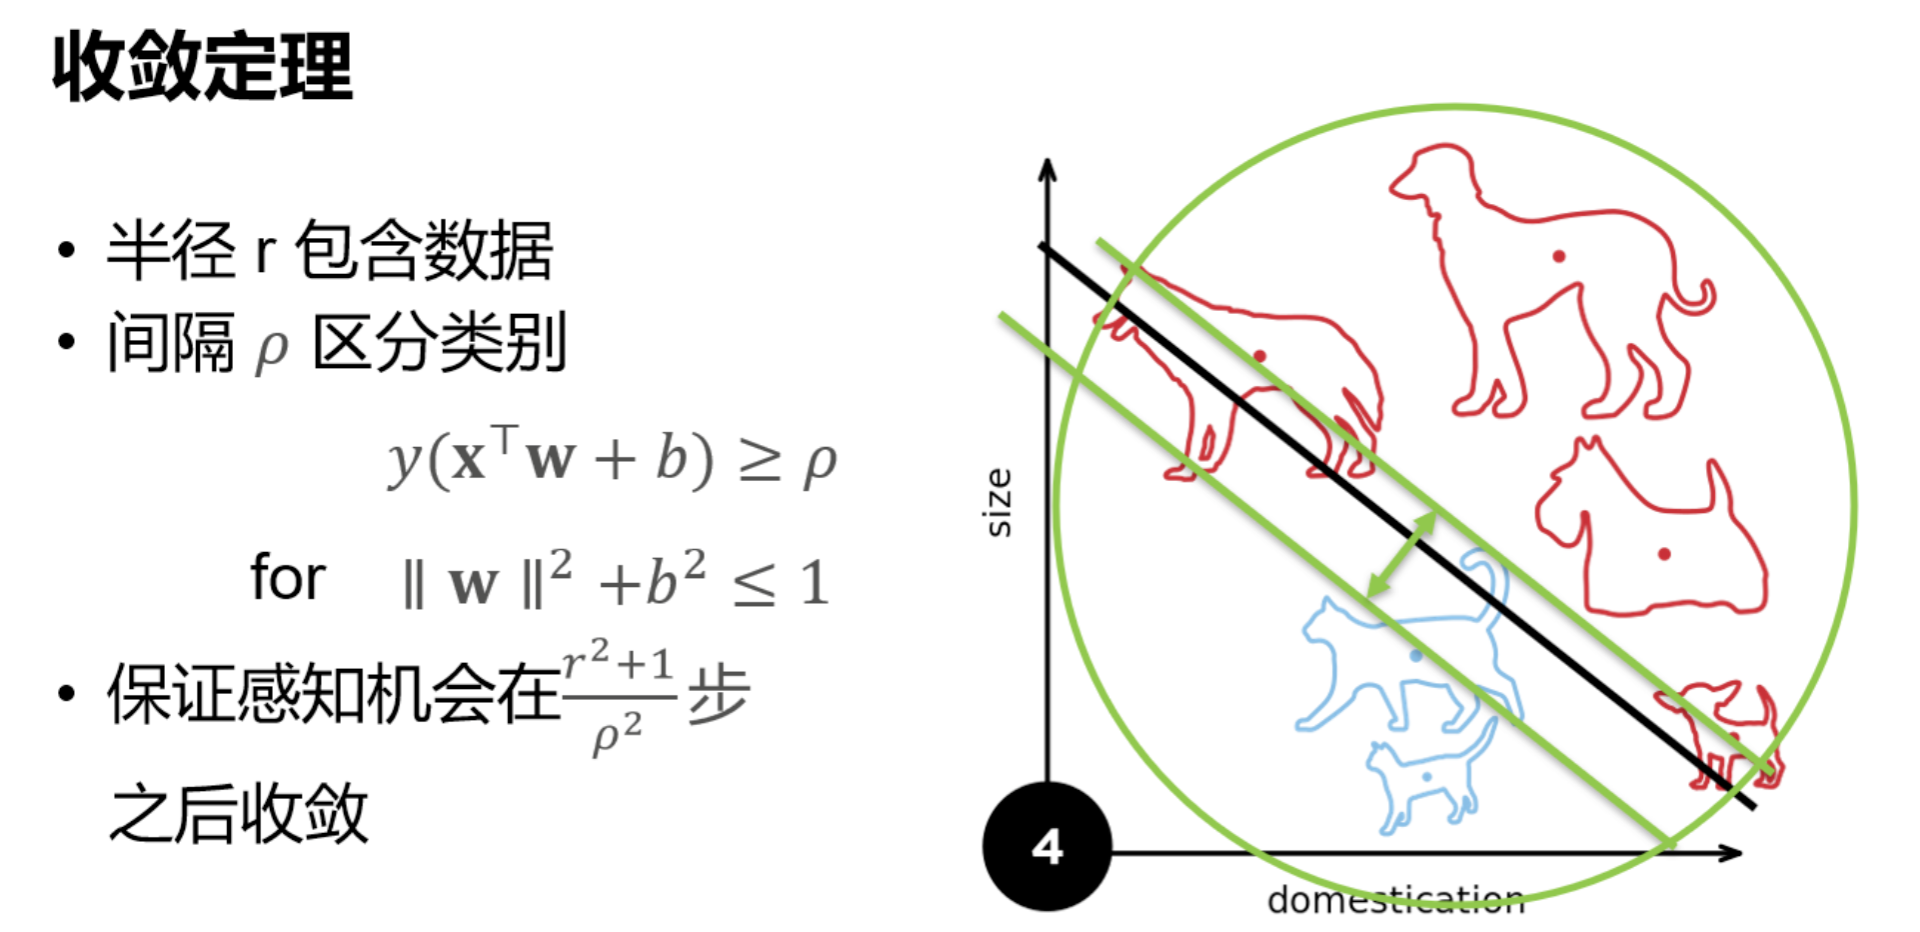

感知机只能产生**线性分割面**，不能拟合XOR函数。导致了AI的第一次寒冬
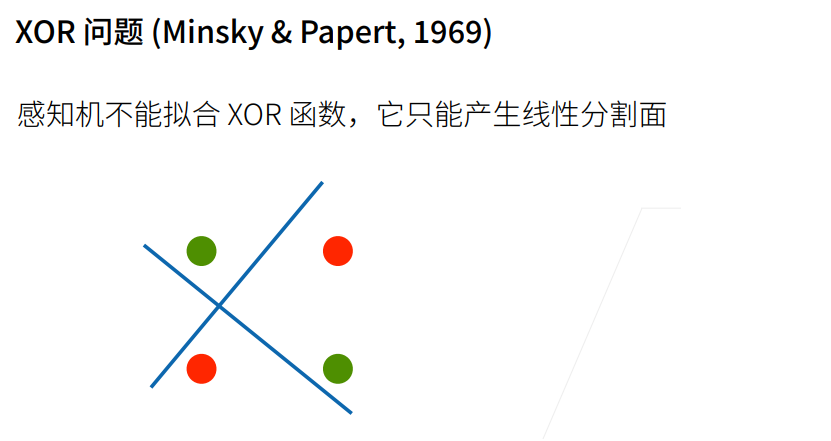

## 多层感知机
一层不能完成的事情交给多层做！
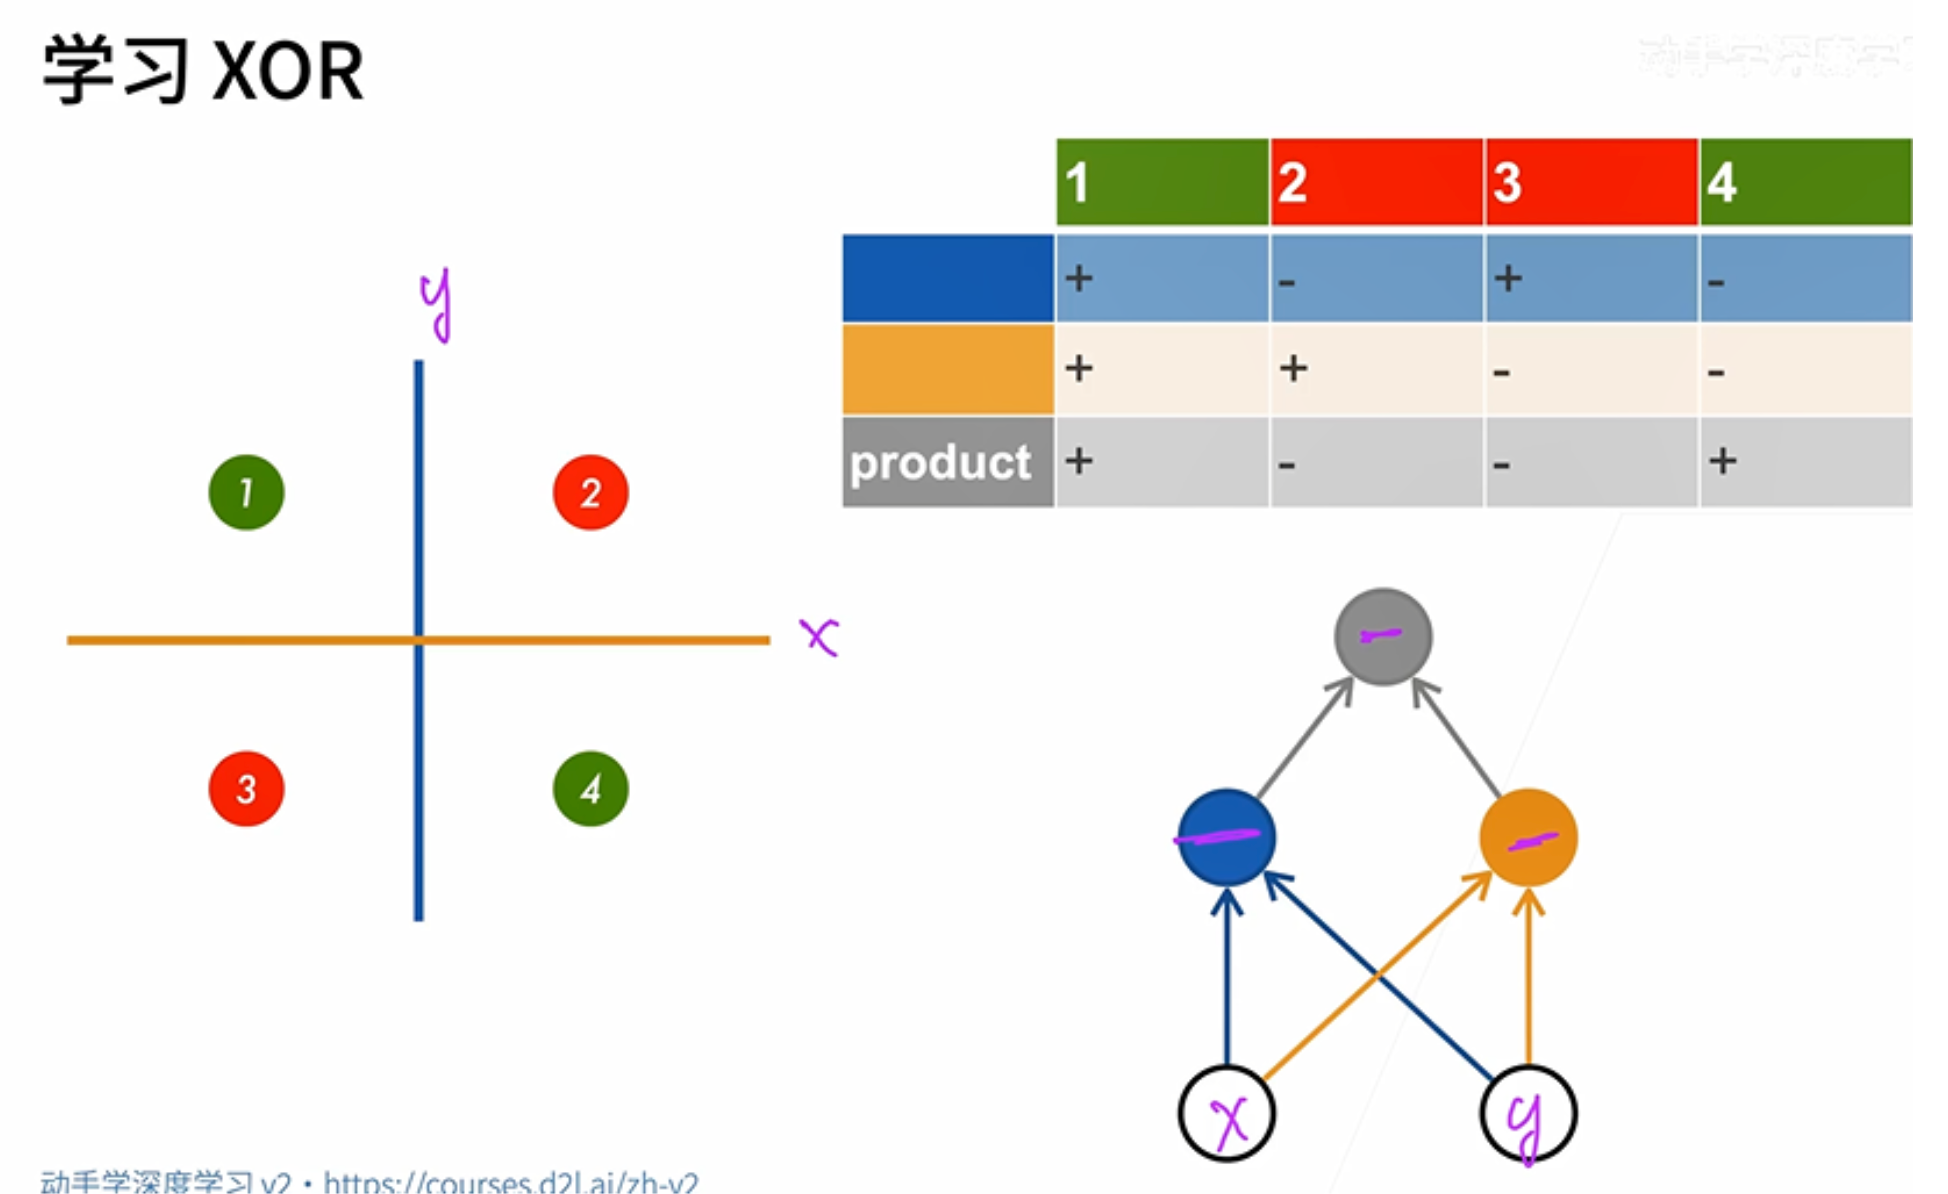

激活函数
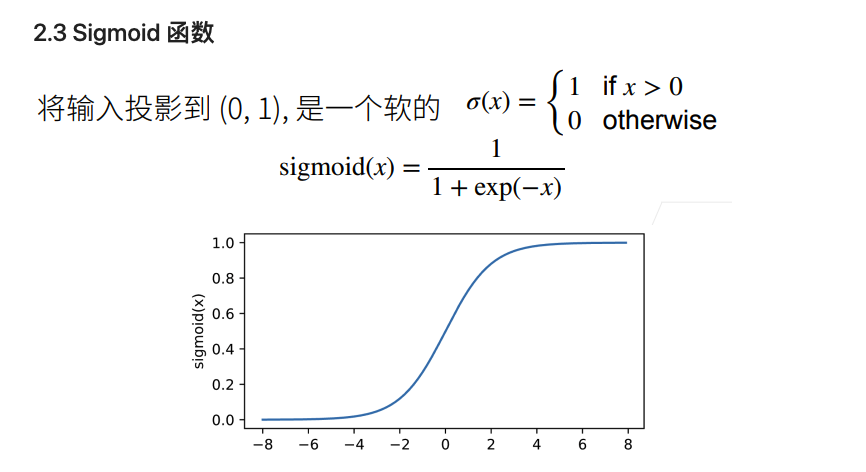
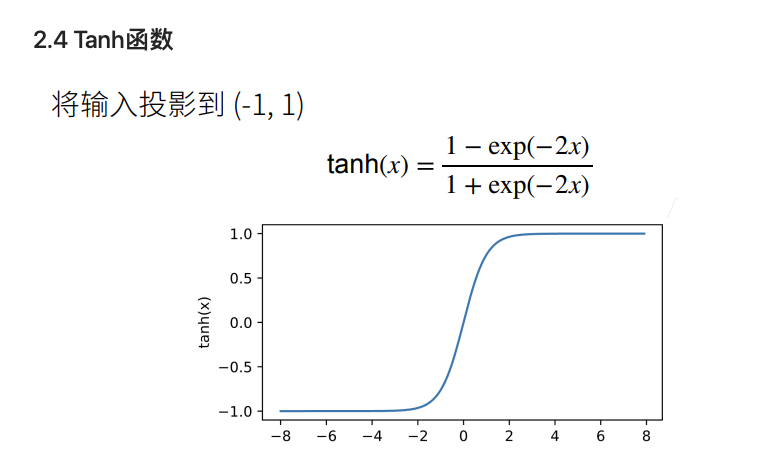
- 指数运算很慢 所以relu函数很简单 速度很快 大家都喜欢

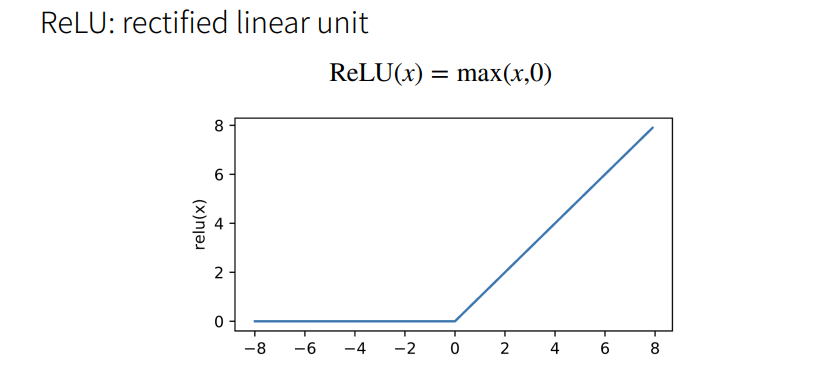

多类分类问题
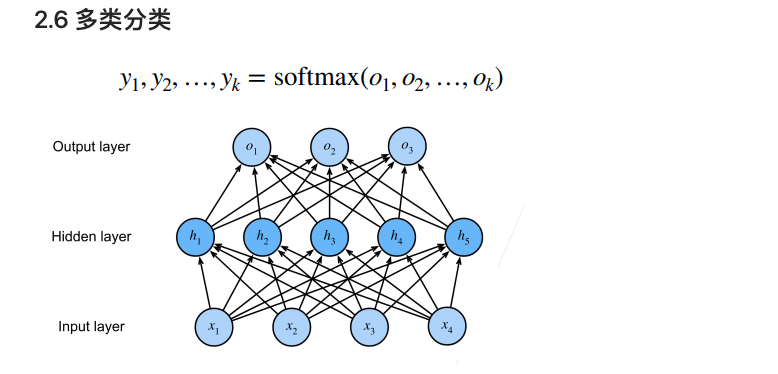
多隐藏层 每层隐藏层大小慢慢减少 将多维度的输入逐渐压缩到输出上去
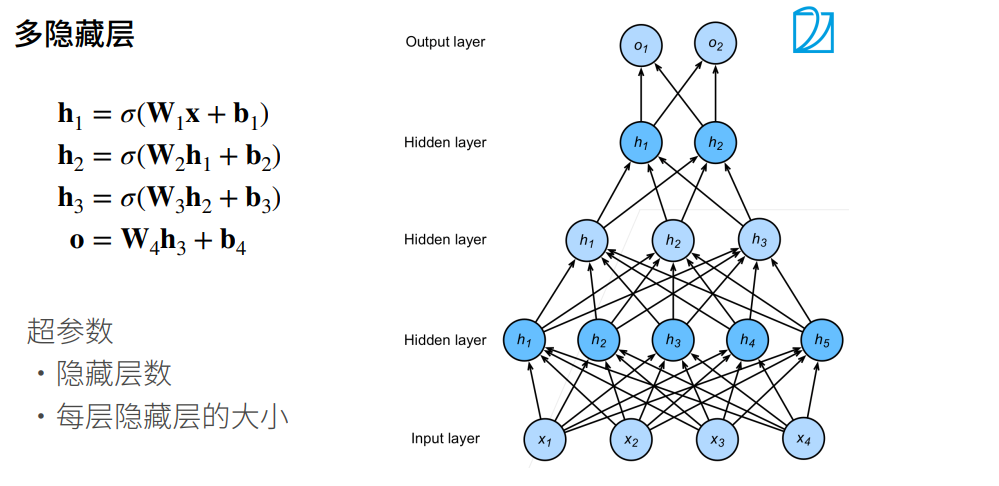

总结
- 多层感知机使用隐藏层和激活函数来得到非线性模型
- 常用激活函数是Sigmoid，Tanh，ReLU
- 使用Softmax来处理多类分类
- 超参数內隐藏层数，和各个隐藏层大小

QA：
1. 神经网络中的一层网络到底是指什么？  
一层通常是带有权重的一层，输入层不算做一层  


2. 为什么神经网络要增加隐藏层的层数，而不是神经元的个数？  
网络可以采用层数少而神经元多的模型（矮胖），也可以采用层数多而神经元少的模型（高瘦）。但是，前者不好训练，后者容易训练。后者即是深度学习，前者是 “浅度学习”。不好训练的原因就是需要一次拟合大量的神经元，一口气吃成胖子很难，而把一个复杂的东西分成多个步骤去学习就很容易了，所以叫 “深度学习”

# 从0实现


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 实现一个具有单隐藏层的多层感知机，包含256个隐藏单元
num_inputs,num_outputs,num_hiddens=784,10,256 #输入，输出是数据决定的 256是超参数，自己决定的
W1 = nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)) #Parameter定义可学习参数（即权重和偏置）的类。这些参数在训练过程中会被优化器更新。
b1 = nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
params = [W1,b1,W2,b2]


# Relu激活函数
def relu(X):
    a = torch.zeros_like(X) #数据类型、形状都一样，但是值全为 0
    return torch.max(X,a)

# 损失函数
loss = nn.CrossEntropyLoss() #交叉熵损失
# 实现模型
## 与传统的*运算符不同，*在处理张量时通常是对应元素相乘（，而@是执行矩阵乘法。
def net(X):
#     print(X.shape)
    X = X.reshape((-1,num_inputs))
#     print(X.shape)
    H = relu(X @ W1+b1)
    return (H @ W2 + b2)


In [ ]:
# 训练过程
num_epochs,lr = 30,0.1
updater = torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
)

# 框架实现


In [5]:
import torch
from torch import nn
from d2l import torch as d2l

# 网络设置
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0) #normal_函数会按照正态分布来初始化权重。std = 0表示正态分布的标准差为 0
net.apply(init_weights)

# 其他设置
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

# 训练过程
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

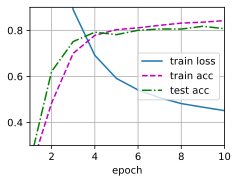

In [6]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)